In [1]:
import pandas as pd
import spacy
from spacy.pipeline import EntityRuler
import tqdm
import glob

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Add your custom EntityRuler
ruler = nlp.add_pipe("entity_ruler", before="ner")

# Your patterns
complaint_patterns = [
    {"label": "SERVICE", "pattern": "Comcast"},
    {"label": "SERVICE", "pattern": "Airline"},
    {"label": "SERVICE", "pattern": "Healthcare"},
    {"label": "SERVICE", "pattern": "Trains"},
    {"label": "SERVICE", "pattern": "Banks"},
    {"label": "SERVICE", "pattern": "United States"},
    {"label": "SERVICE", "pattern": "ER"},
    {"label": "SERVICE", "pattern": "Youtube"},
    {"label": "SERVICE", "pattern": "Reddit"},
    {"label": "SERVICE", "pattern": "Lunar Coin"}
]

ruler.add_patterns(complaint_patterns)

# Load data
df = pd.read_csv("RS_2024-07.csv", names=["id", "date", "title", "author", "url", "content", "post_id", "timestamp", "subreddit"])



df.head()



C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


,id,date,title,author,url,content,post_id,timestamp,subreddit
0,1,2024-06-30,AHCCCS Plan coverage,u/SnooMacaroons7902,https://www.reddit.com/r/Tucson/comments/1dsfb...,Currently applying for Medicaid. I have three...,1dsfbki,1.719792e+09,t5_2qmno
1,1,2024-06-30,Give up everything for a relationship?,u/Keeepz,https://www.reddit.com/r/Vent/comments/1dsfbr3...,"\nI'm M33, I've been living with my girlfriend...",1dsfbr3,1.719792e+09,t5_2qimv
2,1,2024-06-30,Nvme not visible,u/Savage-shredder,https://www.reddit.com/r/PcBuild/comments/1dsf...,https://www.reddit.com/gallery/1dsfbrl,1dsfbrl,1.719792e+09,t5_2x4n9
3,8,2024-06-30,could someone help me figure out how to play NG2?,u/Subject_Swimming6327,https://www.reddit.com/r/ninjagaiden/comments/...,I can emulate any game via Xenia except for NG...,1dsfbts,1.719792e+09,t5_2tlvw
4,1,2024-06-30,19 [F4M] #Online Sub Seeking Degradation to Cu...,u/Yomismo202222,https://www.reddit.com/r/BDSMpersonals/comment...,Hi all! I'm a sub with a huge kink for Degrada...,1dsfbu7,1.719792e+09,t5_2smyd


In [2]:
services = [
    "Comcast", "Airline", "Healthcare", "Trains", "Banks", "United States",
    "ER", "Youtube", "Reddit", "Lunar Coin"
]

# Build regex pattern for fast searching (case insensitive)
pattern = r'|'.join(services)

# Filter rows where content mentions any service
filtered_df = df[df['content' ].str.contains(pattern, case=False, na=False) |
                df['subreddit'].str.contains(pattern, case=False, na=False) ]

print(f"Original size: {len(df)}")
print(f"Filtered size: {len(filtered_df)}")

Original size: 559921
Filtered size: 498550


In [3]:
neg_words = ["bad", "terrible", "lazy", "worst", "awful", "scam", "horrible", "broken", "slow"]

pattern_neg = r'|'.join(neg_words)

complaint_df = filtered_df[
    filtered_df['content'].str.contains(pattern_neg, case=False, na=False)
]

complaint_df.head()


,id,date,title,author,url,content,post_id,timestamp,subreddit
0,1,2024-06-30,AHCCCS Plan coverage,u/SnooMacaroons7902,https://www.reddit.com/r/Tucson/comments/1dsfb...,Currently applying for Medicaid. I have three...,1dsfbki,1.719792e+09,t5_2qmno
1,1,2024-06-30,Give up everything for a relationship?,u/Keeepz,https://www.reddit.com/r/Vent/comments/1dsfbr3...,"\nI'm M33, I've been living with my girlfriend...",1dsfbr3,1.719792e+09,t5_2qimv
3,8,2024-06-30,could someone help me figure out how to play NG2?,u/Subject_Swimming6327,https://www.reddit.com/r/ninjagaiden/comments/...,I can emulate any game via Xenia except for NG...,1dsfbts,1.719792e+09,t5_2tlvw
4,1,2024-06-30,19 [F4M] #Online Sub Seeking Degradation to Cu...,u/Yomismo202222,https://www.reddit.com/r/BDSMpersonals/comment...,Hi all! I'm a sub with a huge kink for Degrada...,1dsfbu7,1.719792e+09,t5_2smyd
5,1,2024-06-30,need advice: homophobic queer sibling,u/antimitosis,https://www.reddit.com/r/lgbt/comments/1dsfbud...,religious guilt and homophobia mentioned.\n\nm...,1dsfbud,1.719792e+09,t5_2qhh7


In [4]:
complaint_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466751 entries, 0 to 559920
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         466751 non-null  int64  
 1   date       466751 non-null  object 
 2   title      466751 non-null  object 
 3   author     466751 non-null  object 
 4   url        466751 non-null  object 
 5   content    466751 non-null  object 
 6   post_id    466751 non-null  object 
 7   timestamp  466751 non-null  float64
 8   subreddit  466751 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 35.6+ MB


In [5]:
from tqdm.notebook import tqdm

In [ ]:
batch_size = 5000
max_length = 1000  # Skip posts longer than this
skipped_posts = []

for start in tqdm(range(0, len(df), batch_size)):
    end = start + batch_size
    batch = df.iloc[start:end].copy()

    # Only keep rows with short enough content
    batch = batch[batch['content'].str.len() < max_length]

    texts = batch['content'].tolist()
    ner_results = []

    for doc, row in zip(nlp.pipe(texts, batch_size=50), batch.itertuples()):
        try:
            ents = [(ent.text, ent.label_) for ent in doc.ents]
        except Exception as e:
            print(f"Skipping post {row.post_id} due to error: {e}")
            skipped_posts.append(row.post_id)
            ents = []

        ner_results.append(ents)

    batch['entities'] = ner_results

    batch.to_csv(f'ner_results_batch_July_{start}.csv', index=False)

# Save skipped post IDs
pd.Series(skipped_posts).to_csv('skipped_posts.csv', index=False)

print("NER complete.")


  0%|          | 0/112 [00:00<?, ?it/s]

In [ ]:
import glob

# Load all batch files
files = glob.glob("ner_results_batch_*.csv")

dfs = [pd.read_csv(f) for f in files]

final_ner_df = pd.concat(dfs, ignore_index=True)
final_ner_df.to_csv('ner_results_full.csv', index=False)


In [ ]:
final_ner_df.head()

,id,date,title,author,url,content,post_id,timestamp,subreddit,entities
0,1,2024-04-30,Suffering,u/Bright_Possibility_6,https://www.reddit.com/r/SuicideWatch/comments...,Nothing I can do to end my life. Suicide is no...,1ch7wdu,1.714522e+09,t5_2qpzs,"[('9 straight years', 'DATE'), ('39 years old'..."
1,1,2024-04-30,Just found these in my classes,u/Ace_Redditor,https://www.reddit.com/r/tragedeigh/comments/1...,https://www.reddit.com/gallery/1ch7wfw,1ch7wfw,1.714522e+09,t5_4y7u0c,"[('https://www.reddit.com/gallery/1ch7wfw', 'G..."
2,2,2024-04-30,Caveman Rap,u/Oopsifellinawell,https://www.reddit.com/r/lildarkie/comments/1c...,https://i.redd.it/5j7gwnt0hpxc1.jpeg,1ch7wjq,1.714522e+09,t5_xmf03,[]
3,1,2024-04-30,Is there a way to check various airports to se...,u/Airplane_yahoo,https://www.reddit.com/r/aviationmaintenance/c...,"I know the big cities will have majors, but th...",1ch7wkn,1.714522e+09,t5_31e80,[]
4,1,2024-04-30,Weird arm pain?,u/Possible_Emphasis139,https://www.reddit.com/r/beyondthebump/comment...,I’m a FTM to a three month old and on Friday I...,1ch7wks,1.714522e+09,t5_2u06v,"[('three month old', 'DATE'), ('Friday', 'DATE')]"


In [ ]:
from collections import Counter
import ast

entity_counter = Counter()

for entities in final_ner_df['entities']:
    ents = ast.literal_eval(entities)
    entity_counter.update([e[0] for e in ents])

print(entity_counter.most_common(20))


[('first', 43540), ('one', 29813), ('2', 27279), ('today', 20633), ('3', 18960), ('two', 17835), ('1', 17479), ('4', 10855), ('5', 10499), ('second', 9801), ('yesterday', 7342), ('10', 6325), ('the day', 6205), ('6', 5398), ('English', 5222), ('years', 5214), ('One', 5027), ('Reddit', 4651), ('Idk', 4623), ('tomorrow', 4577)]


In [ ]:
subreddit_counter = final_ner_df['subreddit'].value_counts()

print(subreddit_counter.head(20))


subreddit
t5_2vqun     3610
t5_2qjdm     3094
t5_33rc6     3086
t5_3pvrd     2528
t5_2rjli     2517
t5_2w844     2483
t5_2xtuc     2309
t5_2vfcm     2126
t5_294odh    1946
t5_2qpzs     1916
t5_2qmij     1829
t5_7f6cy1    1732
t5_122hf1    1712
t5_2tkvu     1551
t5_2ranw     1489
t5_2qqqf     1422
t5_2qirg     1359
t5_2ya0t     1330
t5_2sxk3     1308
t5_2ra79     1283
Name: count, dtype: int64


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()


In [ ]:
def get_sentiment(text):
    if isinstance(text, str):
        return analyzer.polarity_scores(text)['compound']
    return 0.0  # Neutral if empty or NaN

final_ner_df['sentiment'] = final_ner_df['content'].apply(get_sentiment)


In [ ]:
# Extract SERVICE entities only
service_sentiments = []

for row in final_ner_df.itertuples():
    ents = ast.literal_eval(row.entities)
    services = [e[0] for e in ents if e[1] == 'SERVICE']
    for service in services:
        service_sentiments.append((service, row.sentiment))

service_df = pd.DataFrame(service_sentiments, columns=['service', 'sentiment'])

service_avg_sentiment = service_df.groupby('service')['sentiment'].mean().sort_values()

print(service_avg_sentiment)


service
ER              -0.425083
Airline         -0.269600
Trains          -0.162220
Comcast         -0.059850
Healthcare      -0.049539
Reddit           0.073840
Youtube          0.210015
Banks            0.274438
United States    0.493326
Name: sentiment, dtype: float64


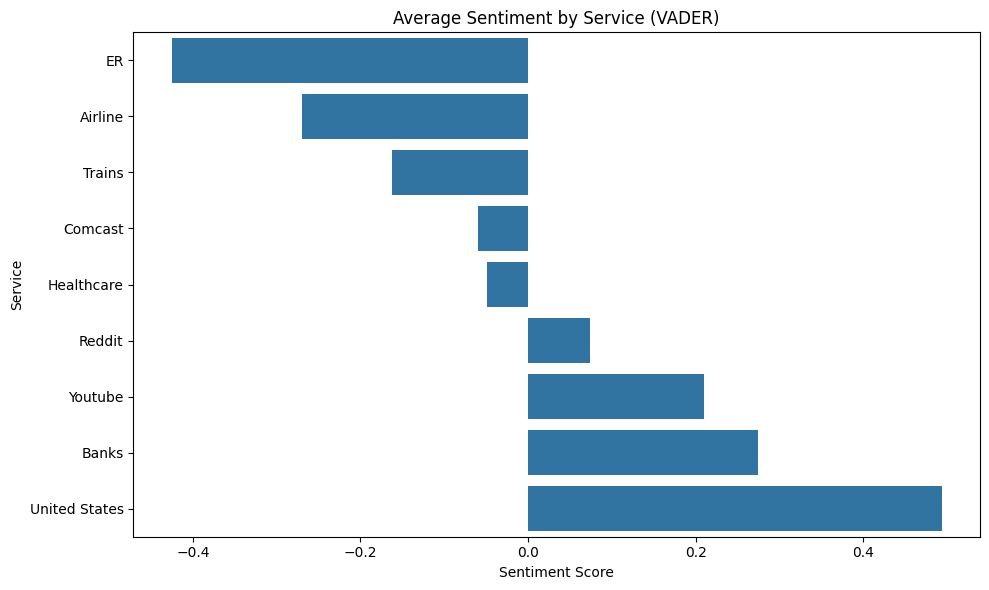

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x=service_avg_sentiment.values, y=service_avg_sentiment.index)
plt.title("Average Sentiment by Service (VADER)")
plt.xlabel("Sentiment Score")
plt.ylabel("Service")
plt.tight_layout()
plt.show()


In [ ]:
final_ner_df['date'] = pd.to_datetime(final_ner_df['date'])  # or 'timestamp' column if you used that

In [ ]:
service_sentiments = []

for row in final_ner_df.itertuples():
    ents = ast.literal_eval(row.entities)
    services = [e[0] for e in ents if e[1] == 'SERVICE']
    for service in services:
        service_sentiments.append((row.date, service, row.sentiment))

service_time_df = pd.DataFrame(service_sentiments, columns=['date', 'service', 'sentiment'])


In [ ]:
# Resample weekly for smoother lines
service_time_df = service_time_df.set_index('date')

avg_sentiment_time = service_time_df.groupby(['service']).resample('7D').mean().reset_index()


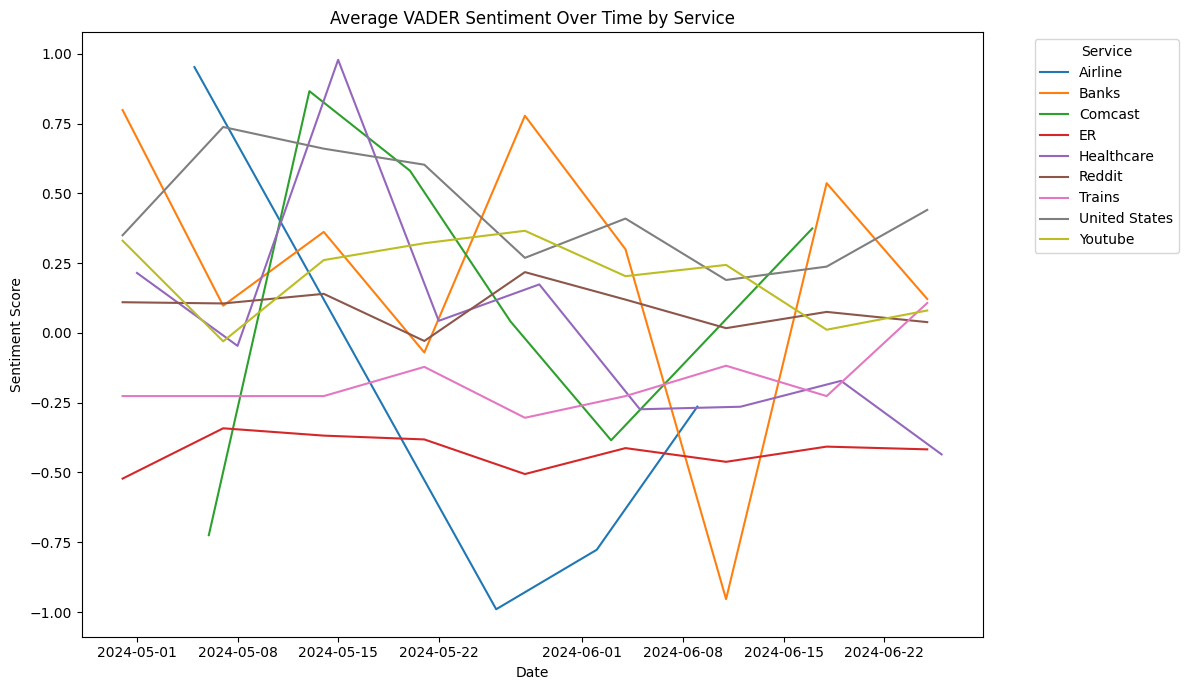

In [ ]:
plt.figure(figsize=(12, 7))

sns.lineplot(
    data=avg_sentiment_time,
    x='date',
    y='sentiment',
    hue='service'
)

plt.title("Average VADER Sentiment Over Time by Service")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.legend(title='Service', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


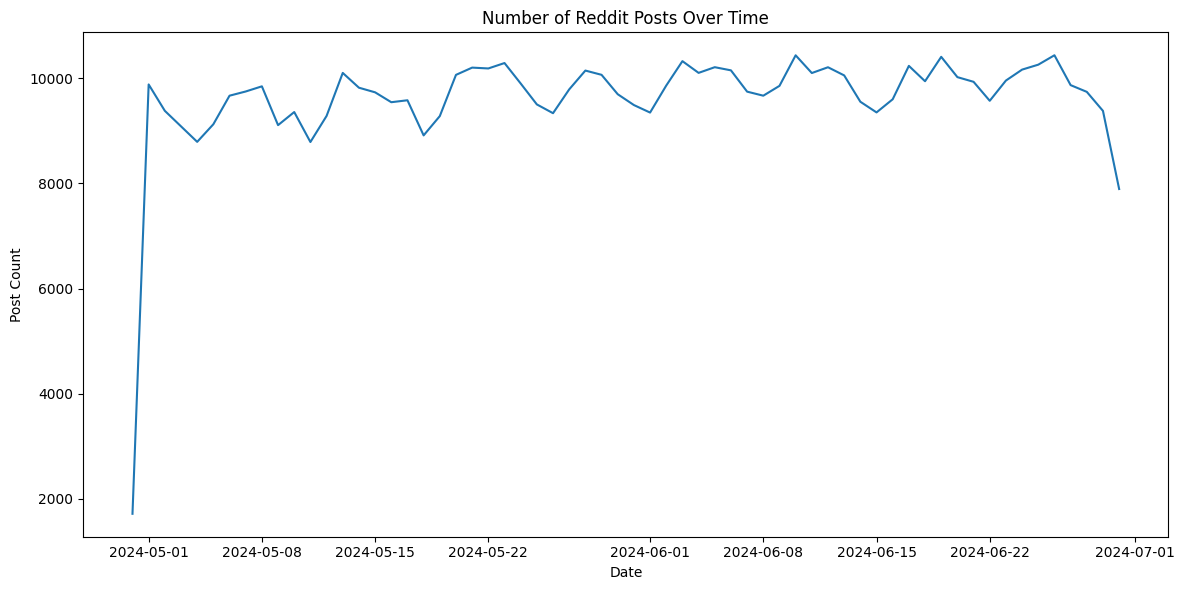

In [ ]:
post_freq = final_ner_df.set_index('date').resample('1D').size().reset_index(name='post_count')

plt.figure(figsize=(12, 6))

sns.lineplot(data=post_freq, x='date', y='post_count')

plt.title("Number of Reddit Posts Over Time")
plt.xlabel("Date")
plt.ylabel("Post Count")
plt.tight_layout()
plt.show()
